<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/deep_learning/105/save_keras_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -qq https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/save-keras-model/save-keras-model.zip
!unzip -qq save-keras-model.zip
%cd save-keras-model

/content/save-keras-model


In [3]:
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

from pyimagesearch.preprocessing import ImageToArrayPreprocessor
from pyimagesearch.preprocessing import SimplePreprocessor
from pyimagesearch.datasets import SimpleDatasetLoader
from pyimagesearch.nn.conv import ShallowNet

In [4]:
args = {
    "dataset": "animals",
    "model": "shallownet_weights.hdf5"
}

In [5]:
print("[INFO] loading images...")
image_paths = list(paths.list_images(args["dataset"]))

# init image processors
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

# load dataset and rescale to [0, 1]
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(image_paths, verbose=500)
data = data.astype("float") / 255.0

[INFO] loading images...
[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


In [6]:
# partition data into train and test splits (75/25)
(train_x, test_x, train_y, test_y) = train_test_split(
    data,
    labels,
    test_size=0.25,
    random_state=42
)

# convert labels from integers to vectors
train_y = LabelBinarizer().fit_transform(train_y)
test_y = LabelBinarizer().fit_transform(test_y)

In [7]:
# init optimizer and model
print("[INFO] compiling model...")
opt = SGD(learning_rate=0.005)
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)

# train network
print("[INFO] training network...")
H = model.fit(
    train_x,
    train_y,
    validation_data=(test_x, test_y),
    batch_size=32,
    epochs=100,
    verbose=1
)

[INFO] compiling model...
[INFO] training network...
Epoch 1/100
71/71 [==============================] - 3s 31ms/step - loss: 1.0194 - accuracy: 0.4649 - val_loss: 1.1594 - val_accuracy: 0.4400
Epoch 2/100
71/71 [==============================] - 2s 26ms/step - loss: 0.9349 - accuracy: 0.5249 - val_loss: 0.8869 - val_accuracy: 0.5533
Epoch 3/100
71/71 [==============================] - 2s 30ms/step - loss: 0.8937 - accuracy: 0.5564 - val_loss: 1.0038 - val_accuracy: 0.5067
Epoch 4/100
71/71 [==============================] - 2s 29ms/step - loss: 0.8796 - accuracy: 0.5613 - val_loss: 0.8599 - val_accuracy: 0.5920
Epoch 5/100
71/71 [==============================] - 3s 45ms/step - loss: 0.8617 - accuracy: 0.5609 - val_loss: 0.9616 - val_accuracy: 0.5347
Epoch 6/100
71/71 [==============================] - 3s 40ms/step - loss: 0.8304 - accuracy: 0.5947 - val_loss: 1.0000 - val_accuracy: 0.5400
Epoch 7/100
71/71 [==============================] - 2s 29ms/step - loss: 0.8236 - accuracy: 0.

In [8]:
# save network to disk
print("[INFO] serializing networl...")
model.save(args["model"])

# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(test_x, batch_size=32)
print(
    classification_report(
        test_y.argmax(axis=1),
        predictions.argmax(axis=1),
        target_names=["cat", "dog", "panda"]
    )
)

[INFO] serializing networl...
[INFO] evaluating network...
24/24 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

         cat       0.64      0.69      0.66       249
         dog       0.59      0.60      0.59       239
       panda       0.88      0.79      0.83       262

    accuracy                           0.70       750
   macro avg       0.70      0.69      0.70       750
weighted avg       0.71      0.70      0.70       750



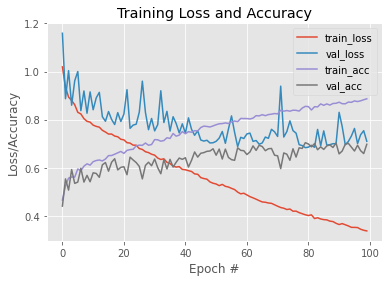

In [9]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()